In [2]:

##########################################################
#  Python script template for Question 1 (IAML Level 10)
#  Note that
#  - You should not change the name of this file, 'iaml01cw2_q1.py', which is the file name you should use when you submit your code for this question.
#  - You should write code for the functions defined below. Do not change their names.
#  - You can define function arguments (parameters) and returns (attributes) if necessary.
#  - In case you define additional functions, do not define them here, but put them in a separate Python module file, "iaml01cw2_my_helpers.py", and import it in this script.
#  - For those questions requiring you to show results in tables, your code does not need to present them in tables - just showing them with print() is fine.
#  - You do not need to include this header in your submission.
##########################################################

#--- Code for loading modules and the data set and pre-processing --->
# NB: You can edit the following and add code (e.g. code for loading sklearn) if necessary.

import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from iaml01cw2_helpers import *
# from iaml01cw2_my_helpers import *

#<----

C:\Users\Chris\miniconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [3]:
# Steps to retrieve data
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST("../data")
    
# STEP 1: Make copies of original X data
Xtrn_orig = Xtrn.copy()
Xtst_orig = Xtst.copy()
    
# STEP 2: Divide each elemnt of Xtrn and Xtst
Xtrn = np.divide(Xtrn, 255.0)
Xtst = np.divide(Xtst, 255.0)
    
# STEP 3: Find mean of each col in Xtrn
Xmean = np.mean(Xtrn, axis=0)
    
# STEP 4: Subtract mean from each from of Xtrn and Xtst
Xtrn_nm = np.subtract(Xtrn, Xmean)
Xtst_nm = np.subtract(Xtst, Xmean)

In [3]:
# Q1.1
def iaml01cw2_q1_1():    
    # First 4 elems from the first and last training sample
    print(Xtrn_nm[0,:4])
    print(Xtrn_nm[-1,:4])
        
iaml01cw2_q1_1()

[-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]
[-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]


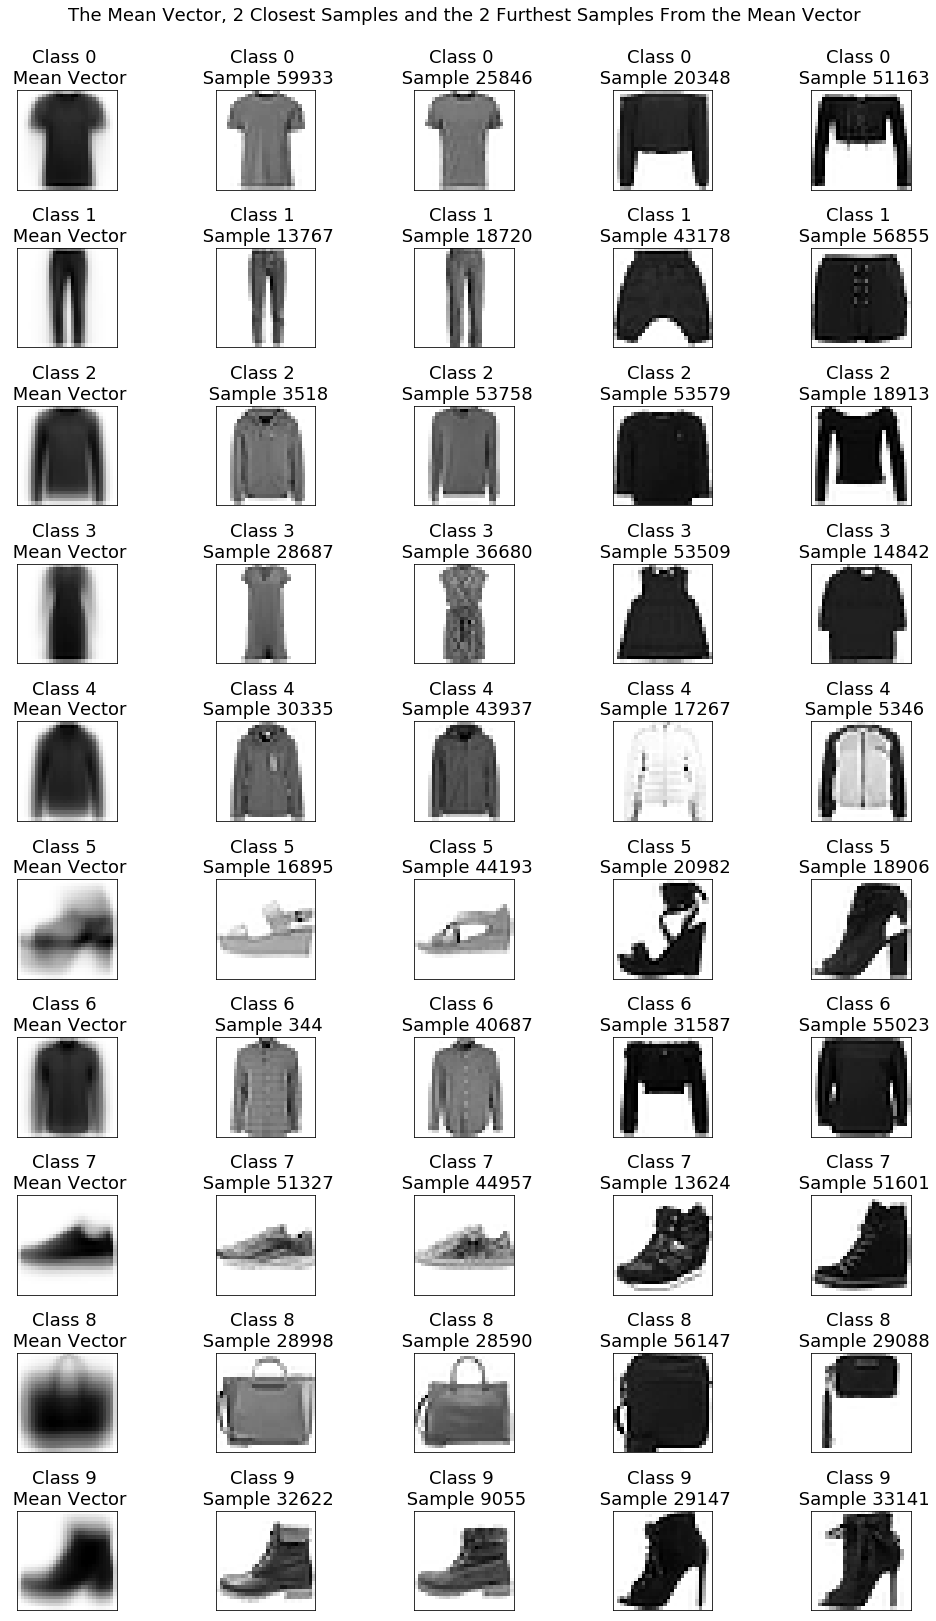

In [12]:
# Q1.2
def iaml01cw2_q1_2():
    # This is extremely messy as I hadn't realised samples were evenly dispersed between the classes
    # and forgot about some wee tricks. I also was a bit confused with subplotting. But hey it works.
    
    # Initialise vars
    dists0 = []
    dists1 = []
    dists2 = []
    dists3 = []
    dists4 = []
    dists5 = []
    dists6 = []
    dists7 = []
    dists8 = []
    dists9 = []  
    
    # Find mean of each class
    Xmean_class0 = Xtrn[Ytrn==0].mean(axis=0)
    Xmean_class1 = Xtrn[Ytrn==1].mean(axis=0)
    Xmean_class2 = Xtrn[Ytrn==2].mean(axis=0)
    Xmean_class3 = Xtrn[Ytrn==3].mean(axis=0)
    Xmean_class4 = Xtrn[Ytrn==4].mean(axis=0)
    Xmean_class5 = Xtrn[Ytrn==5].mean(axis=0)
    Xmean_class6 = Xtrn[Ytrn==6].mean(axis=0)
    Xmean_class7 = Xtrn[Ytrn==7].mean(axis=0)
    Xmean_class8 = Xtrn[Ytrn==8].mean(axis=0)
    Xmean_class9 = Xtrn[Ytrn==9].mean(axis=0)
    
    # Use numpy.linalg.norm to find Euclidian distances for each 10 classes, and their index
    for i in range(60000):
        img_class = Ytrn[i]
        if img_class == 0 : dists0.append([np.linalg.norm(Xtrn[i]-Xmean_class0), i])
        if img_class == 1 : dists1.append([np.linalg.norm(Xtrn[i]-Xmean_class1), i])
        if img_class == 2 : dists2.append([np.linalg.norm(Xtrn[i]-Xmean_class2), i])
        if img_class == 3 : dists3.append([np.linalg.norm(Xtrn[i]-Xmean_class3), i])
        if img_class == 4 : dists4.append([np.linalg.norm(Xtrn[i]-Xmean_class4), i])    
        if img_class == 5 : dists5.append([np.linalg.norm(Xtrn[i]-Xmean_class5), i])    
        if img_class == 6 : dists6.append([np.linalg.norm(Xtrn[i]-Xmean_class6), i])    
        if img_class == 7 : dists7.append([np.linalg.norm(Xtrn[i]-Xmean_class7), i])   
        if img_class == 8 : dists8.append([np.linalg.norm(Xtrn[i]-Xmean_class8), i])   
        if img_class == 9 : dists9.append([np.linalg.norm(Xtrn[i]-Xmean_class9), i])
            
    # Sort lists and find the 2 mins and 2 maxes
    dists0.sort()
    _, c0_min1_sample = dists0[0]
    _, c0_min2_sample = dists0[1]
    _, c0_max1_sample = dists0[-1]
    _, c0_max2_sample = dists0[-2]
    
    dists1.sort()
    _, c1_min1_sample = dists1[0]
    _, c1_min2_sample = dists1[1]
    _, c1_max1_sample = dists1[-1]
    _, c1_max2_sample = dists1[-2]
    
    dists2.sort()
    _, c2_min1_sample = dists2[0]
    _, c2_min2_sample = dists2[1]
    _, c2_max1_sample = dists2[-1]
    _, c2_max2_sample = dists2[-2]
    
    dists3.sort()
    _, c3_min1_sample = dists3[0]
    _, c3_min2_sample = dists3[1]
    _, c3_max1_sample = dists3[-1]
    _, c3_max2_sample = dists3[-2]
    
    dists4.sort()
    _, c4_min1_sample = dists4[0]
    _, c4_min2_sample = dists4[1]
    _, c4_max1_sample = dists4[-1]
    _, c4_max2_sample = dists4[-2]
    
    dists5.sort()
    _, c5_min1_sample = dists5[0]
    _, c5_min2_sample = dists5[1]
    _, c5_max1_sample = dists5[-1]
    _, c5_max2_sample = dists5[-2]
    
    dists6.sort()
    _, c6_min1_sample = dists6[0]
    _, c6_min2_sample = dists6[1]
    _, c6_max1_sample = dists6[-1]
    _, c6_max2_sample = dists6[-2]
    
    dists7.sort()
    _, c7_min1_sample = dists7[0]
    _, c7_min2_sample = dists7[1]
    _, c7_max1_sample = dists7[-1]
    _, c7_max2_sample = dists7[-2]
    
    dists8.sort()
    _, c8_min1_sample = dists8[0]
    _, c8_min2_sample = dists8[1]
    _, c8_max1_sample = dists8[-1]
    _, c8_max2_sample = dists8[-2]
        
    dists9.sort()
    _, c9_min1_sample = dists9[0]
    _, c9_min2_sample = dists9[1]
    _, c9_max1_sample = dists9[-1]
    _, c9_max2_sample = dists9[-2]
    
    fig, ax = plt.subplots(10, 5, subplot_kw={'xticks': [], 'yticks': []}, figsize=(14,23))
    
    ax[0, 0].imshow(Xmean_class0.reshape(28,28), cmap='gray_r')
    ax[1, 0].imshow(Xmean_class1.reshape(28,28), cmap='gray_r')
    ax[2, 0].imshow(Xmean_class2.reshape(28,28), cmap='gray_r')
    ax[3, 0].imshow(Xmean_class3.reshape(28,28), cmap='gray_r')
    ax[4, 0].imshow(Xmean_class4.reshape(28,28), cmap='gray_r')
    ax[5, 0].imshow(Xmean_class5.reshape(28,28), cmap='gray_r')
    ax[6, 0].imshow(Xmean_class6.reshape(28,28), cmap='gray_r')
    ax[7, 0].imshow(Xmean_class7.reshape(28,28), cmap='gray_r')
    ax[8, 0].imshow(Xmean_class8.reshape(28,28), cmap='gray_r')
    ax[9, 0].imshow(Xmean_class9.reshape(28,28), cmap='gray_r')
        
    ax[0, 1].imshow(Xtrn[c0_min1_sample].reshape(28,28), cmap='gray_r')
    ax[1, 1].imshow(Xtrn[c1_min1_sample].reshape(28,28), cmap='gray_r')
    ax[2, 1].imshow(Xtrn[c2_min1_sample].reshape(28,28), cmap='gray_r')
    ax[3, 1].imshow(Xtrn[c3_min1_sample].reshape(28,28), cmap='gray_r')
    ax[4, 1].imshow(Xtrn[c4_min1_sample].reshape(28,28), cmap='gray_r')
    ax[5, 1].imshow(Xtrn[c5_min1_sample].reshape(28,28), cmap='gray_r')
    ax[6, 1].imshow(Xtrn[c6_min1_sample].reshape(28,28), cmap='gray_r')
    ax[7, 1].imshow(Xtrn[c7_min1_sample].reshape(28,28), cmap='gray_r')
    ax[8, 1].imshow(Xtrn[c8_min1_sample].reshape(28,28), cmap='gray_r')
    ax[9, 1].imshow(Xtrn[c9_min1_sample].reshape(28,28), cmap='gray_r')
    
    ax[0, 2].imshow(Xtrn[c0_min2_sample].reshape(28,28), cmap='gray_r')
    ax[1, 2].imshow(Xtrn[c1_min2_sample].reshape(28,28), cmap='gray_r')
    ax[2, 2].imshow(Xtrn[c2_min2_sample].reshape(28,28), cmap='gray_r')
    ax[3, 2].imshow(Xtrn[c3_min2_sample].reshape(28,28), cmap='gray_r')
    ax[4, 2].imshow(Xtrn[c4_min2_sample].reshape(28,28), cmap='gray_r')
    ax[5, 2].imshow(Xtrn[c5_min2_sample].reshape(28,28), cmap='gray_r')
    ax[6, 2].imshow(Xtrn[c6_min2_sample].reshape(28,28), cmap='gray_r')
    ax[7, 2].imshow(Xtrn[c7_min2_sample].reshape(28,28), cmap='gray_r')
    ax[8, 2].imshow(Xtrn[c8_min2_sample].reshape(28,28), cmap='gray_r')
    ax[9, 2].imshow(Xtrn[c9_min2_sample].reshape(28,28), cmap='gray_r')
    
    ax[0, 3].imshow(Xtrn[c0_max2_sample].reshape(28,28), cmap='gray_r')
    ax[1, 3].imshow(Xtrn[c1_max2_sample].reshape(28,28), cmap='gray_r')
    ax[2, 3].imshow(Xtrn[c2_max2_sample].reshape(28,28), cmap='gray_r')
    ax[3, 3].imshow(Xtrn[c3_max2_sample].reshape(28,28), cmap='gray_r')
    ax[4, 3].imshow(Xtrn[c4_max2_sample].reshape(28,28), cmap='gray_r')
    ax[5, 3].imshow(Xtrn[c5_max2_sample].reshape(28,28), cmap='gray_r')
    ax[6, 3].imshow(Xtrn[c6_max2_sample].reshape(28,28), cmap='gray_r')
    ax[7, 3].imshow(Xtrn[c7_max2_sample].reshape(28,28), cmap='gray_r')
    ax[8, 3].imshow(Xtrn[c8_max2_sample].reshape(28,28), cmap='gray_r')
    ax[9, 3].imshow(Xtrn[c9_max2_sample].reshape(28,28), cmap='gray_r')
    
    ax[0, 4].imshow(Xtrn[c0_max1_sample].reshape(28,28), cmap='gray_r')
    ax[1, 4].imshow(Xtrn[c1_max1_sample].reshape(28,28), cmap='gray_r')
    ax[2, 4].imshow(Xtrn[c2_max1_sample].reshape(28,28), cmap='gray_r')
    ax[3, 4].imshow(Xtrn[c3_max1_sample].reshape(28,28), cmap='gray_r')
    ax[4, 4].imshow(Xtrn[c4_max1_sample].reshape(28,28), cmap='gray_r')
    ax[5, 4].imshow(Xtrn[c5_max1_sample].reshape(28,28), cmap='gray_r')
    ax[6, 4].imshow(Xtrn[c6_max1_sample].reshape(28,28), cmap='gray_r')
    ax[7, 4].imshow(Xtrn[c7_max1_sample].reshape(28,28), cmap='gray_r')
    ax[8, 4].imshow(Xtrn[c8_max1_sample].reshape(28,28), cmap='gray_r')
    ax[9, 4].imshow(Xtrn[c9_max1_sample].reshape(28,28), cmap='gray_r')
    
    plt.rc('font', size="15")
    
    ax[0, 0].set_title("Class 0 \n Mean Vector")
    ax[1, 0].set_title("Class 1 \n Mean Vector")
    ax[2, 0].set_title("Class 2 \n Mean Vector")
    ax[3, 0].set_title("Class 3 \n Mean Vector")
    ax[4, 0].set_title("Class 4 \n Mean Vector")
    ax[5, 0].set_title("Class 5 \n Mean Vector")
    ax[6, 0].set_title("Class 6 \n Mean Vector")
    ax[7, 0].set_title("Class 7 \n Mean Vector")
    ax[8, 0].set_title("Class 8 \n Mean Vector")
    ax[9, 0].set_title("Class 9 \n Mean Vector")
    
    ax[0, 1].set_title("Class 0 \n Sample {0}".format(c0_min1_sample))
    ax[1, 1].set_title("Class 1 \n Sample {0}".format(c1_min1_sample))
    ax[2, 1].set_title("Class 2 \n Sample {0}".format(c2_min1_sample))
    ax[3, 1].set_title("Class 3 \n Sample {0}".format(c3_min1_sample))
    ax[4, 1].set_title("Class 4 \n Sample {0}".format(c4_min1_sample))
    ax[5, 1].set_title("Class 5 \n Sample {0}".format(c5_min1_sample))
    ax[6, 1].set_title("Class 6 \n Sample {0}".format(c6_min1_sample))
    ax[7, 1].set_title("Class 7 \n Sample {0}".format(c7_min1_sample))
    ax[8, 1].set_title("Class 8 \n Sample {0}".format(c8_min1_sample))
    ax[9, 1].set_title("Class 9 \n Sample {0}".format(c9_min1_sample))
    
    ax[0, 2].set_title("Class 0 \n Sample {0}".format(c0_min2_sample))
    ax[1, 2].set_title("Class 1 \n Sample {0}".format(c1_min2_sample))
    ax[2, 2].set_title("Class 2 \n Sample {0}".format(c2_min2_sample))
    ax[3, 2].set_title("Class 3 \n Sample {0}".format(c3_min2_sample))
    ax[4, 2].set_title("Class 4 \n Sample {0}".format(c4_min2_sample))
    ax[5, 2].set_title("Class 5 \n Sample {0}".format(c5_min2_sample))
    ax[6, 2].set_title("Class 6 \n Sample {0}".format(c6_min2_sample))
    ax[7, 2].set_title("Class 7 \n Sample {0}".format(c7_min2_sample))
    ax[8, 2].set_title("Class 8 \n Sample {0}".format(c8_min2_sample))
    ax[9, 2].set_title("Class 9 \n Sample {0}".format(c9_min2_sample))
    
    ax[0, 3].set_title("Class 0 \n Sample {0}".format(c0_max2_sample))
    ax[1, 3].set_title("Class 1 \n Sample {0}".format(c1_max2_sample))
    ax[2, 3].set_title("Class 2 \n Sample {0}".format(c2_max2_sample))
    ax[3, 3].set_title("Class 3 \n Sample {0}".format(c3_max2_sample))
    ax[4, 3].set_title("Class 4 \n Sample {0}".format(c4_max2_sample))
    ax[5, 3].set_title("Class 5 \n Sample {0}".format(c5_max2_sample))
    ax[6, 3].set_title("Class 6 \n Sample {0}".format(c6_max2_sample))
    ax[7, 3].set_title("Class 7 \n Sample {0}".format(c7_max2_sample))
    ax[8, 3].set_title("Class 8 \n Sample {0}".format(c8_max2_sample))
    ax[9, 3].set_title("Class 9 \n Sample {0}".format(c9_max2_sample))
    
    ax[0, 4].set_title("Class 0 \n Sample {0}".format(c0_max1_sample))
    ax[1, 4].set_title("Class 1 \n Sample {0}".format(c1_max1_sample))
    ax[2, 4].set_title("Class 2 \n Sample {0}".format(c2_max1_sample))
    ax[3, 4].set_title("Class 3 \n Sample {0}".format(c3_max1_sample))
    ax[4, 4].set_title("Class 4 \n Sample {0}".format(c4_max1_sample))
    ax[5, 4].set_title("Class 5 \n Sample {0}".format(c5_max1_sample))
    ax[6, 4].set_title("Class 6 \n Sample {0}".format(c6_max1_sample))
    ax[7, 4].set_title("Class 7 \n Sample {0}".format(c7_max1_sample))
    ax[8, 4].set_title("Class 8 \n Sample {0}".format(c8_max1_sample))
    ax[9, 4].set_title("Class 9 \n Sample {0}".format(c9_max1_sample))
    
    fig.tight_layout()
    fig.subplots_adjust(top=0.93)
    plt.suptitle("The Mean Vector, 2 Closest Samples and the 2 Furthest Samples From the Mean Vector")
    
    plt.show()
    
iaml01cw2_q1_2()

In [8]:
# Q1.3
def iaml01cw2_q1_3():    
    # Fit PCA with normalised X train data, and tranform with X test data
    pca = PCA(n_components=5) # Train w first 5 PCs
    trn_trans = pca.fit_transform(Xtrn_nm)

    # Find the variances
    explained_variance = pca.explained_variance_
    print(explained_variance)
    
    return pca, trn_trans, explained_variance
    
iaml01cw2_q1_3()

[19.80980567 12.11221047  4.10615661  3.38182839  2.62477022]


(PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False),
 array([[-0.48625016,  6.40421332, -4.74918106,  0.94428692, -0.01312953],
        [ 5.52128962, -1.77114249, -1.02363532,  1.43700705,  0.84485459],
        [-2.846709  , -4.32093387,  0.41629111,  0.82365356, -0.41224771],
        ...,
        [ 3.36372626, -4.62839288, -2.04193724, -1.71378515,  0.34010626],
        [-3.16657461, -2.2792897 ,  1.88360752,  1.61877717, -0.46405754],
        [-7.12025023, -0.46958174,  1.83887764,  0.30892071,  0.2329711 ]]),
 array([19.80980567, 12.11221047,  4.10615661,  3.38182839,  2.62477022]))

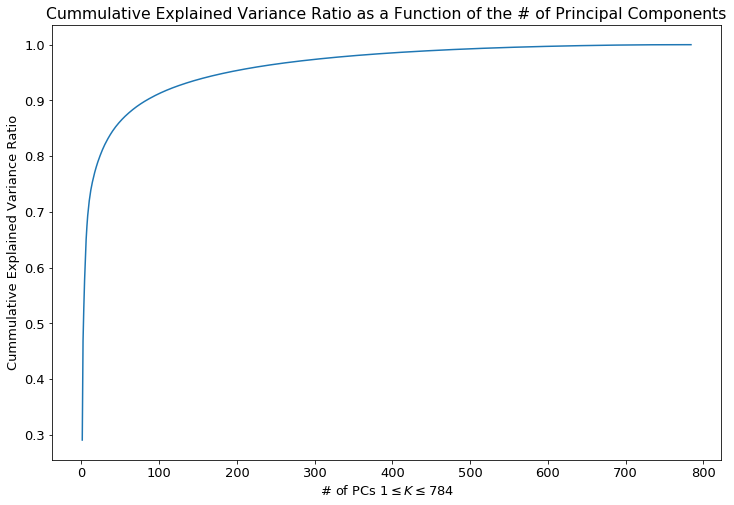

In [24]:
# Q1.4
def iaml01cw2_q1_4():   
    # PCA on all components so we can cumsum the variance ratio
    pca = PCA(n_components=784)
    trn_trans = pca.fit_transform(Xtrn_nm)
    explained_variance = pca.explained_variance_ratio_
    
    # Plot the cumsum of the ratios
    plt.figure(figsize=(12,8))
    plt.plot(np.linspace(1,784,784), np.cumsum(explained_variance))
    plt.rc('font', size="13")
    plt.xlabel("# of PCs $1 \leq K \leq 784$")
    plt.ylabel("Cummulative Explained Variance Ratio")
    plt.title("Cummulative Explained Variance Ratio as a Function of the # of Principal Components")
    plt.show()
    
iaml01cw2_q1_4()

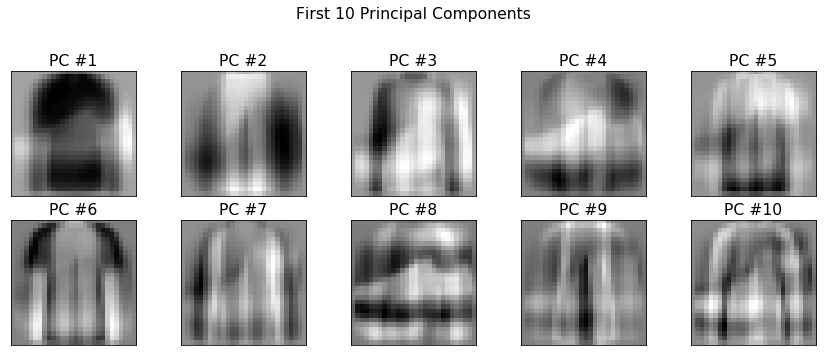

In [12]:
# Q1.5
def iaml01cw2_q1_5():  
    pca = PCA(n_components=10)
    pca.fit_transform(Xtrn_nm)
    
    fig, axs = plt.subplots(2, 5, subplot_kw={'xticks': [], 'yticks': []}, figsize=(12,5))
    plt.rc('font', size="13")
    
    for i, ax in enumerate(axs.flat):
        ax.imshow(pca.components_[i].reshape(28,28), cmap="gray_r")
        ax.set_title("PC #{0}".format(i+1))
    
    fig.tight_layout()
    fig.subplots_adjust(top=0.8)
    plt.suptitle("First 10 Principal Components")      
    plt.show()
    
iaml01cw2_q1_5()

In [8]:
# Q1.6
def iaml01cw2_q1_6():    
    Ks = [5, 20, 50, 200]
    pca = PCA()
    pca.fit(Xtrn_nm)
    Xtrn_nm_recons = np.zeros((10,4,784))
    RMSEs = np.zeros((10,4,1))
    
    for i in range(10):
        for j in range(4):
            trn_trans = pca.transform(Xtrn_nm[Ytrn==i][0].reshape(1,-1))
            trn_trans[:,Ks[j]:] = 0
            Xtrn_nm_recon = pca.inverse_transform(trn_trans)
            RMSEs[i,j] = np.sqrt(mean_squared_error(Xtrn_nm[Ytrn==i][0].reshape(1,-1), Xtrn_nm_recon))
            
            # For Q1.7
            Xtrn_nm_recon += Xmean
            Xtrn_nm_recons[i,j] = Xtrn_nm_recon
            
    print(RMSEs)
    
    return Ks, Xtrn_nm_recons

iaml01cw2_q1_6()

[[[0.25614866]
  [0.15000682]
  [0.12761144]
  [0.06009258]]

 [[0.1980244 ]
  [0.14043966]
  [0.09507974]
  [0.03541976]]

 [[0.19870016]
  [0.14561728]
  [0.12340082]
  [0.07828281]]

 [[0.14565798]
  [0.10725657]
  [0.08342968]
  [0.05604424]]

 [[0.1182087 ]
  [0.10262621]
  [0.08794267]
  [0.04637152]]

 [[0.18112976]
  [0.1586612 ]
  [0.14277478]
  [0.09011229]]

 [[0.12947928]
  [0.09583237]
  [0.07227577]
  [0.04581635]]

 [[0.16562538]
  [0.12782401]
  [0.10661942]
  [0.06217125]]

 [[0.22339659]
  [0.14496876]
  [0.12362768]
  [0.09217217]]

 [[0.18351042]
  [0.15108848]
  [0.12193132]
  [0.07279154]]]


([5, 20, 50, 200],
 array([[[ 4.19917943e-06,  5.04947921e-05,  2.62776185e-04, ...,
           1.94739788e-02,  6.64028912e-03,  5.82713665e-04],
         [ 1.19372463e-05,  9.62857883e-05,  1.08651115e-03, ...,
           1.43165126e-02,  7.96648789e-03,  7.92210510e-04],
         [ 6.84827021e-06,  6.81293150e-05,  1.13732304e-03, ...,
           2.09741211e-02,  5.36826156e-03,  9.02210518e-05],
         [ 3.23470810e-06, -1.15542520e-04,  5.47958684e-04, ...,
           3.08888381e-02,  1.59386364e-02,  1.52619195e-03]],
 
        [[ 3.69863354e-06,  4.37564444e-06,  6.70679750e-05, ...,
           1.02488347e-03,  1.35238747e-04, -5.42941462e-05],
         [-9.23207532e-06, -2.47098968e-05, -1.25288596e-04, ...,
           6.03578347e-03,  1.07730356e-03,  1.35360398e-04],
         [-8.30783844e-06, -3.88049567e-05, -2.02926442e-04, ...,
          -8.83002373e-03, -4.58063489e-03, -3.54774565e-04],
         [ 2.10307493e-05,  3.46314545e-05,  2.13807125e-04, ...,
           2.884

[[[0.25614866]
  [0.15000682]
  [0.12761144]
  [0.06009258]]

 [[0.1980244 ]
  [0.14043966]
  [0.09507974]
  [0.03541976]]

 [[0.19870016]
  [0.14561728]
  [0.12340082]
  [0.07828281]]

 [[0.14565798]
  [0.10725657]
  [0.08342968]
  [0.05604424]]

 [[0.1182087 ]
  [0.10262621]
  [0.08794267]
  [0.04637152]]

 [[0.18112976]
  [0.1586612 ]
  [0.14277478]
  [0.09011229]]

 [[0.12947928]
  [0.09583237]
  [0.07227577]
  [0.04581635]]

 [[0.16562538]
  [0.12782401]
  [0.10661942]
  [0.06217125]]

 [[0.22339659]
  [0.14496876]
  [0.12362768]
  [0.09217217]]

 [[0.18351042]
  [0.15108848]
  [0.12193132]
  [0.07279154]]]


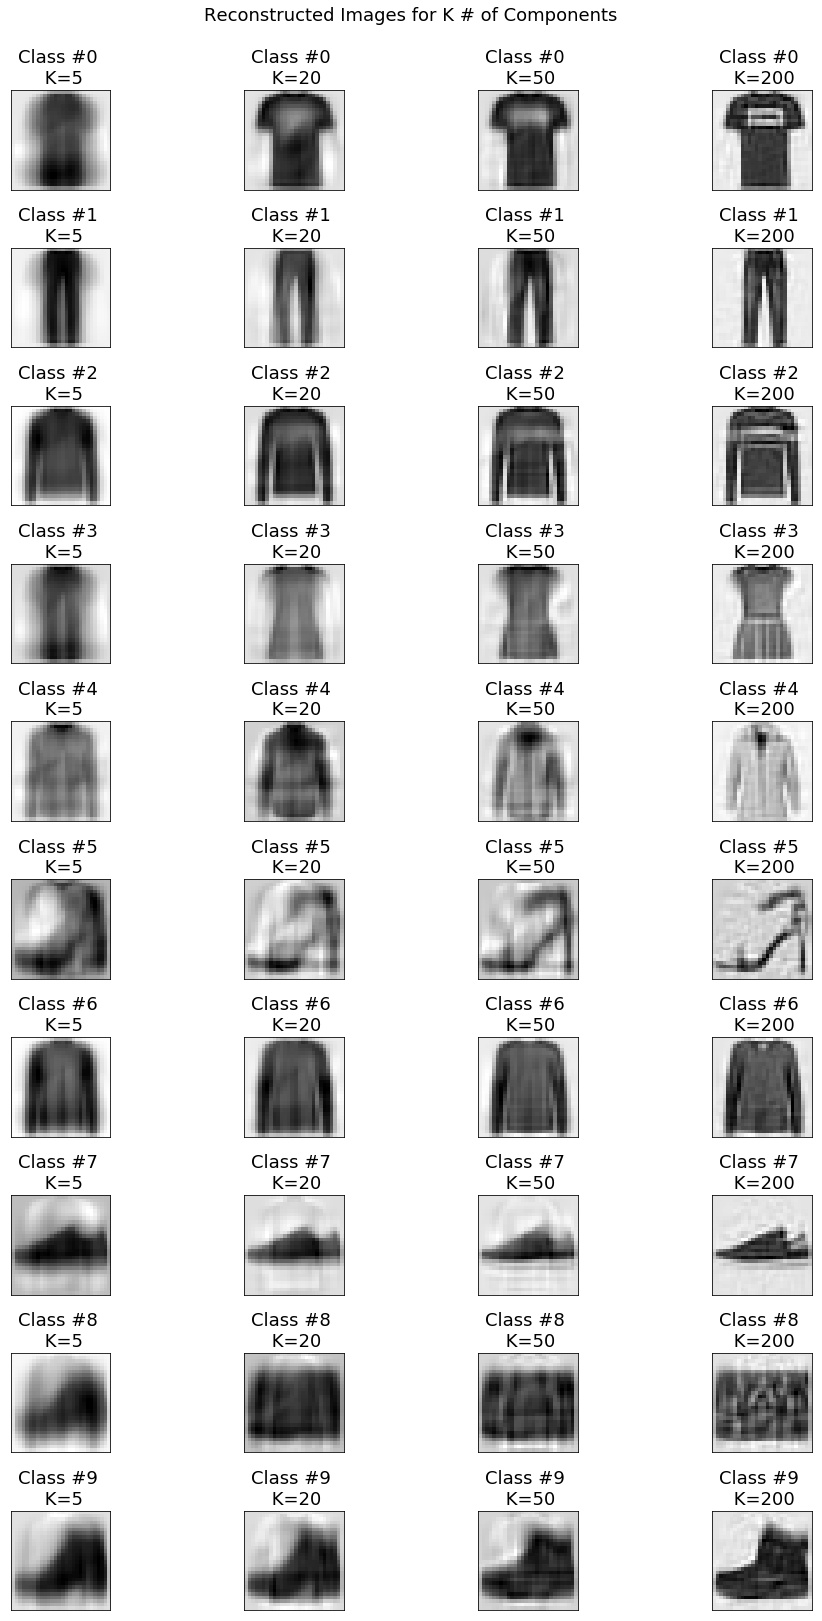

In [9]:
# Q1.7
def iaml01cw2_q1_7():
    # Get all vars from Q1.6
    Ks, Xtrn_nm_recons = iaml01cw2_q1_6()
    
    # Subplot the reconstructed images
    fig, ax = plt.subplots(10, 4, subplot_kw={'xticks': [], 'yticks': []}, figsize=(14,23))
    plt.rc('font', size="15")
    
    for i in range(10):
        for j in range(4):
            ax[i, j].imshow(Xtrn_nm_recons[i,j].reshape(28,28), cmap='gray_r')
            ax[i, j].set_title("Class #{0} \n K={1}".format(i,Ks[j]))
    
    fig.tight_layout()
    fig.subplots_adjust(top=0.93)
    plt.suptitle("Reconstructed Images for K # of Components")
    plt.show()

iaml01cw2_q1_7()

[19.80980567 12.11221047  4.10615661  3.38182839  2.62477022]


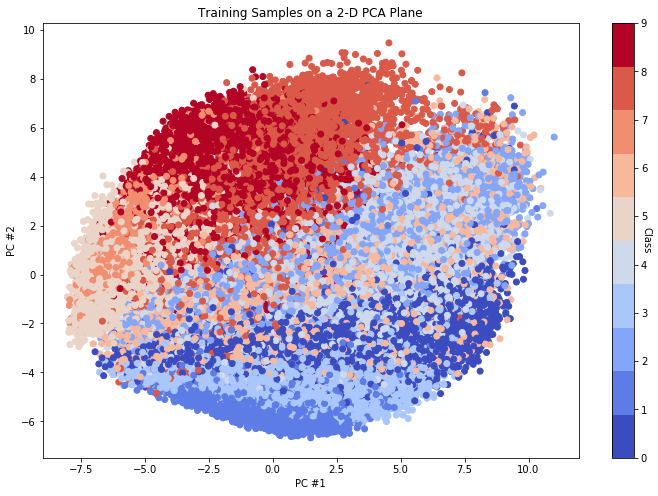

In [13]:
# Q1.8
def iaml01cw2_q1_8():
    # Get all vars from Q1.3
    pca, trn_trans, explained_variance = iaml01cw2_q1_3()
    
    # Get colour map
    colours = plt.cm.get_cmap("coolwarm", 10)
    
    # Scatter plot on the first 2 PCs we found in 1.3
    plt.figure(figsize=(12,8))      
    plt.scatter(trn_trans[:,0], trn_trans[:,1], cmap=colours, c=Ytrn) 
    plt.colorbar().set_label("Class", rotation=270)
    plt.title("Training Samples on a 2-D PCA Plane")
    plt.xlabel('PC #1')
    plt.ylabel('PC #2')
    plt.show()
    
iaml01cw2_q1_8()